<a href="https://colab.research.google.com/github/pavlovado/TAOI/blob/main/frequent_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проведем установку и импорт необходимых библиотек: для поиска частых наборов с использованием алгоритма Apriori, для визуализации, для работы с массивами, для работы с Google Диском.

Алгоритм Apriori используется для поиска частых наборов в больших наборах данных. Он находит такие комбинации товаров, которые часто встречаются в транзакциях, и помогает выявить зависимости между товарами, например, какие товары часто покупаются вместе.

In [ ]:
!pip install apyori
from apyori import apriori as apr
import time as t
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

Подключим Google Диск и загрузим файл baskets.csv. Данные читаются построчно и преобразуются в список списков (baskets).

Пример структуры baskets, где каждый список — это покупательская корзина:

[['молоко', 'хлеб', 'сыр'],

 ['хлеб', 'сыр'],

 ['молоко', 'хлеб'],

 ['молоко', 'сыр']]

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/baskets.csv'

with open(file_path, encoding='cp1251') as f:
    dataset = f.read().split('\n')

baskets = [s.split(',') for s in dataset]

print(baskets)

Mounted at /content/drive
[['креветки', 'миндаль', 'авокадо', 'овощная смесь', 'зеленый виноград', 'цельнозерновая мука', 'батат', 'творог', 'энергетический напиток', 'томатный сок', 'низкокалорийный йогурт', 'зеленый чай', 'мед', 'салат', 'минеральная вода', 'лосось', 'ягодный сок', 'замороженный смузи', 'шпинат', 'оливковое масло'], ['гамбургер', 'фрикадельки', 'яйца'], ['чатни'], ['индейка', 'авокадо'], ['минеральная вода', 'молоко', 'энергетический батончик', 'рис', 'зеленый чай'], ['низкокалорийный йогурт'], ['цельнозерновые макароны', 'картофель-фри'], ['суп', 'низкокалорийный крем', 'лук-шалот'], ['замороженные овощи', 'макароны', 'зеленый чай'], ['картофель-фри'], ['яйца', 'корм для животных'], ['печенье'], ['индейка', 'гамбургер', 'минеральная вода', 'яйца', 'растительное масло'], ['макароны', 'шампанское', 'печенье'], ['минеральная вода', 'лосось'], ['минеральная вода'], ['креветки', 'шоколад', 'курица', 'мед', 'масло', 'растительное масло', 'низкокалорийный йогурт'], ['индей

Проведем поиск частых наборов для различных значений порога поддержки. Частый набор — это подмножество товаров, которое встречается в данных чаще определенной границы. А эта граница называется порогом поддержки – отношение количества транзакций набора к общему количеству.


1.   Минимальная поддержка (min_support) — это доля транзакций, в которых должен встречаться товарный набор, чтобы он считался "частым". В коде используются несколько значений порога поддержки: 1%, 3%, 5%, 10%, 15%.
2.   Для каждого значения порога запускается алгоритм Apriori, и его время выполнения измеряется с помощью функции `time()`. Результаты выполнения (находки частых наборов) и время выполнения сохраняются в списках `results` и `times` соответственно.
3. После выполнения алгоритма для всех значений порога выводятся два списка:

*   `times` — время выполнения алгоритма для каждого порога поддержки в миллисекундах.
*   `results` — найденные частые наборы товаров для каждого значения поддержки.




In [ ]:
import time as t

results = []
times = []
supports = [0.01, 0.03, 0.05, 0.1, 0.15]

for supp in supports:
    st_time = t.time() * 1000  # фиксация времени до выполнения
    rules = apr(baskets, min_support=supp)  # запуск алгоритма для каждого значения поддержки
    results.append(list(rules))  # сохраняем найденные частые наборы
    times.append(t.time() * 1000 - st_time)  # фиксация времени выполнения

print(times)
print(results)

[193.6357421875, 82.26806640625, 59.871337890625, 44.432861328125, 22.855224609375]
[[RelationRecord(items=frozenset({'авокадо'}), support=0.03332444681418288, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'авокадо'}), confidence=0.03332444681418288, lift=1.0)]), RelationRecord(items=frozenset({'баклажаны'}), support=0.013196480938416423, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'баклажаны'}), confidence=0.013196480938416423, lift=1.0)]), RelationRecord(items=frozenset({'батат'}), support=0.011463609704078913, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'батат'}), confidence=0.011463609704078913, lift=1.0)]), RelationRecord(items=frozenset({'белое вино'}), support=0.01652892561983471, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'белое вино'}), confidence=0.01652892561983471, lift=1.0)]), RelationRecord(items=frozenset({'белый сыр'}), s

Отобразим график зависимости времени выполнения от порога поддержки.

На графике заметно, что с увеличением порога поддержки время выполнения уменьшается. Это связано с тем, что при более высоких значениях поддержки алгоритм обрабатывает меньше частых наборов. При увеличении порога поддержки число частых наборов уменьшается, и алгоритм работает быстрее.

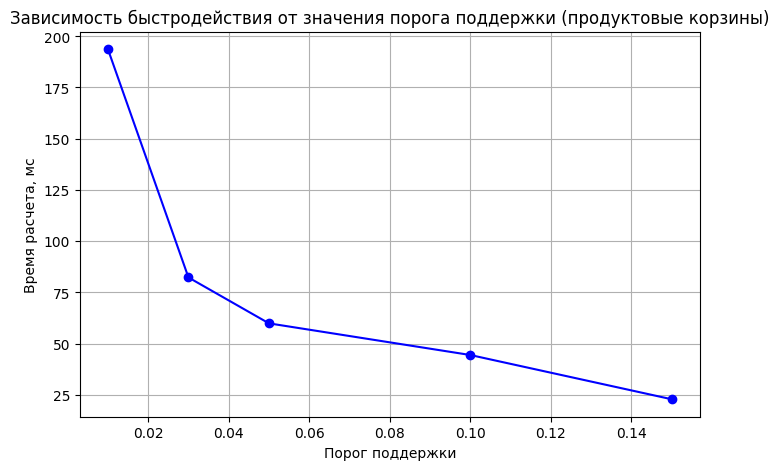

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(supports, times, marker='o', linestyle='-', color='b')
plt.title("Зависимость быстродействия от значения порога поддержки (продуктовые корзины)")
plt.xlabel("Порог поддержки")
plt.ylabel("Время расчета, мс")
plt.grid(True)
plt.show()

Проанализируем распределение частых наборов товаров по их длине (количеству товаров в наборе) для различных значений порога поддержки.

В словаре `length_counts`, будет храниться количество наборов разной длины. *Ключи* — это длина набора (1, 2 или 3).
*Значения* — это списки, в которых будут храниться количества частых наборов для каждой длины при разных порогах поддержки.

В конце у нас получится словарь `length_counts`, который хранит распределение количества частых наборов разной длины (1, 2 и 3) для каждого порога поддержки.

Построим график зависимости количества найденных наборов длины 1, 2 и 3 от порога поддержки. Чем меньше поддержка, тем больше найденных частых наборов.


*   Синия линия (Длина 1): Количество частых наборов длины 1 изначально высоко и снижается постепенно. Это говорит о том, что одиночные элементы встречаются чаще, чем более длинные комбинации.
*   Оранжевая линия (Длина 2): Изначально количество частых наборов длины 2 значительно выше, чем у длины 1, но затем резко падает. Это свидетельствует о том, что комбинации из двух элементов намного реже остаются частыми при увеличении порога поддержки.
*  Зеленая линия (Длина 3): Количество частых наборов длины 3 сразу невелико и быстро снижается до нуля, что подтверждает, что длинные комбинации встречаются гораздо реже.



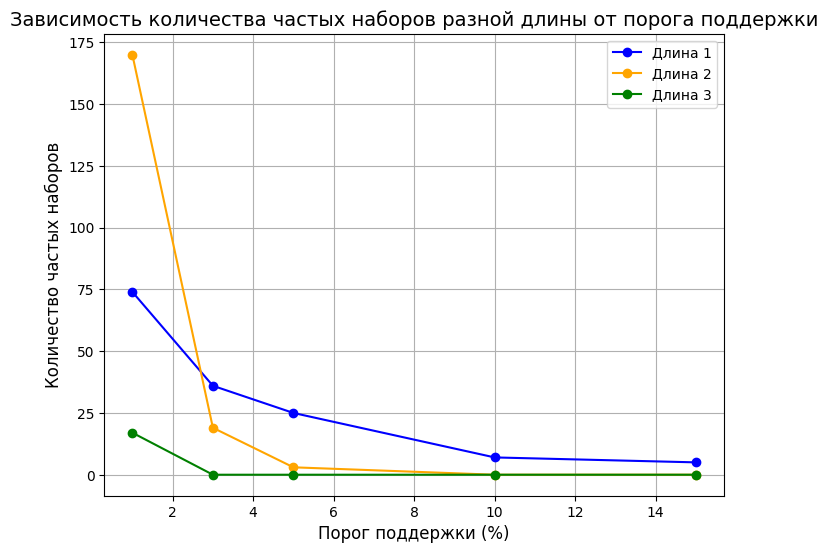

In [ ]:
length_counts = {length: [] for length in range(1, 4)} # словарь для хранения наборов разной длины

for rules in results: # перебираем наборы товаров, найденные раннее
    length_distribution = {1: 0, 2: 0, 3: 0} # словарь для количества наборов разной длины
    for rule in rules: # перебираем товары внутри каждого набора
        length = len(rule.items) # определяем длину набора (сколько товаров)
        if length in length_distribution:
            length_distribution[length] += 1 # если длина 1, 2 или 3, увеличиваем счетчик

    # добавляем данные в общий словарь
    for length in range(1, 4):
        length_counts[length].append(length_distribution[length])

# график
plt.figure(figsize=(8, 6))
colors = ['b', 'orange', 'green']
for i, (length, counts) in enumerate(length_counts.items()):
    plt.plot(np.array(supports) * 100, counts, marker='o', linestyle='-', color=colors[i], label=f'Длина {length}')
plt.xlabel("Порог поддержки (%)", fontsize=12)
plt.ylabel("Количество частых наборов", fontsize=12)
plt.title("Зависимость количества частых наборов разной длины от порога поддержки", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()